In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./data/StudentsPerformance.csv")
df = pd.DataFrame(data)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Here are the details for the columns of the given dataset:

- **Index**: The unique identifier for each record (row) in the dataset.
- **Gender**: The gender of the student (e.g., male, female).
- **Race/Ethnicity**: The race or ethnic group of the student (e.g., group A, group B, group C).
- **Parental Level of Education**: The highest level of education attained by the student's parents (e.g., bachelor's degree, some college, master's degree, associate's degree).
- **Lunch**: The type of lunch the student receives (e.g., standard, free/reduced).
- **Test Preparation Course**: Indicates whether the student completed a test preparation course (e.g., completed, uncompleted).
- **Math Score**: The student's score in the math test.
- **Reading Score**: The student's score in the reading test.
- **Writing Score**: The student's score in the writing test.

Here are the data checks required for the dataset:

- **Check for Missing Values**: Ensure there are no missing or null values in any columns.
- **Check for Duplicates**: Verify that there are no duplicate records in the dataset.
- **Data Type Validation**: Confirm that each column has the correct data type (e.g., scores should be numerical, `math score`, `reading score`, and `writing score`).
- **Range Check for Scores**: Ensure that all scores (`math score`, `reading score`, `writing score`) are within a valid range (typically 0-100).
- **Categorical Value Consistency**: Validate that columns like `gender`, `race/ethnicity`, `parental level of education`, `lunch`, and `test preparation course` have consistent and valid category values.
    - **Gender**: Only includes 'male' or 'female'.
    - **Race/Ethnicity**: Valid groups like `group A`, `group B`, `group C`, etc.
    - **Parental Level of Education**: Only valid educational levels like `bachelor's degree`, `associate's degree`, etc.
    - **Lunch**: Only 'standard' or 'free/reduced'.
    - **Test Preparation Course**: Only 'completed' or 'uncompleted'.
- **Outlier Detection in Scores**: Identify potential outliers in `math score`, `reading score`, or `writing score` that fall outside the typical score range.

In [3]:
#check whether there is any missing data or not
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [4]:
#check whether any duplicate are there or not

for key in df.keys():
    print(f"values for {key}\n")
    print(df[key].value_counts())
    print("\n")

values for gender

gender
female    518
male      482
Name: count, dtype: int64


values for race/ethnicity

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


values for parental level of education

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


values for lunch

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


values for test preparation course

test preparation course
none         642
completed    358
Name: count, dtype: int64


values for math score

math score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64


values for reading score

reading score
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40  

In [5]:
#check for data validation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#check the ranges
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#test preparation course value none changed to uncompleted
df['test preparation course'].replace('none','uncompleted',inplace=True)

In [8]:
categorical_features = []
numerical_features = []
for column in df.columns:
    if(df[column].dtype=='object'):
        categorical_features.append(column)
    else :
        numerical_features.append(column)

numerical_features
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [24]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()
numerical_features.append('average')

In [26]:
for feature in numerical_features:
    full_score = df[df[feature]==100][feature].count()
    print(f"{full_score} students got full in {feature}")

7 students got full in math score
17 students got full in reading score
14 students got full in writing score
3 students got full in average


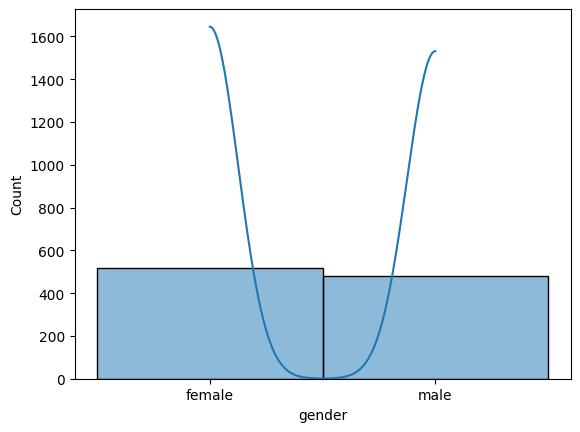

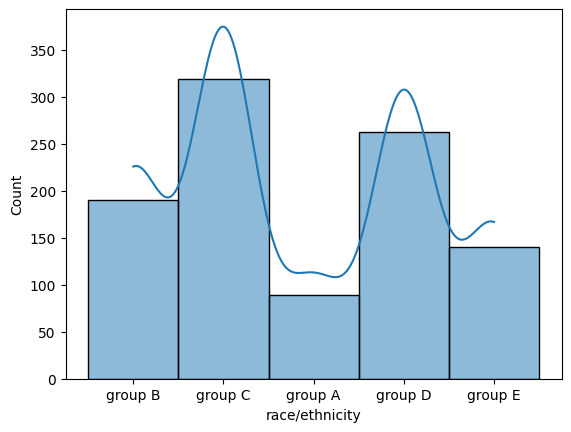

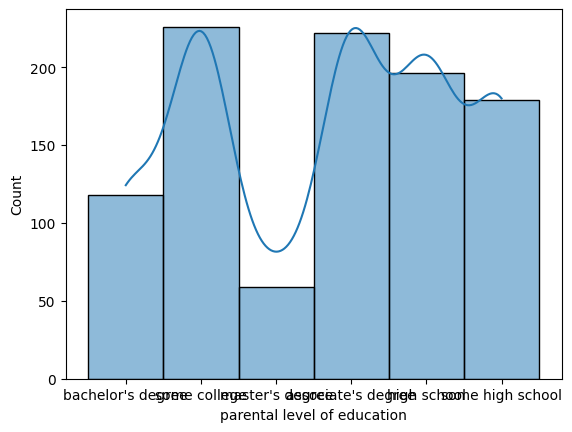

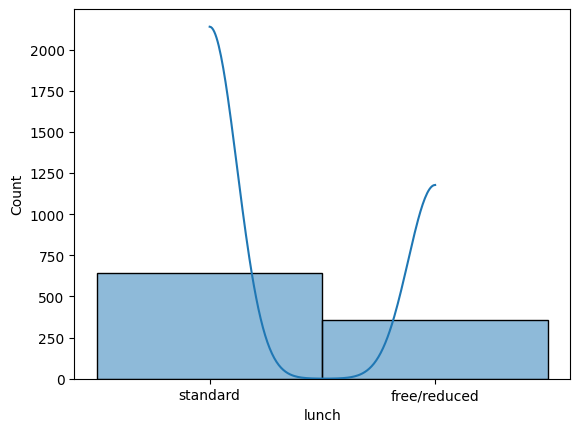

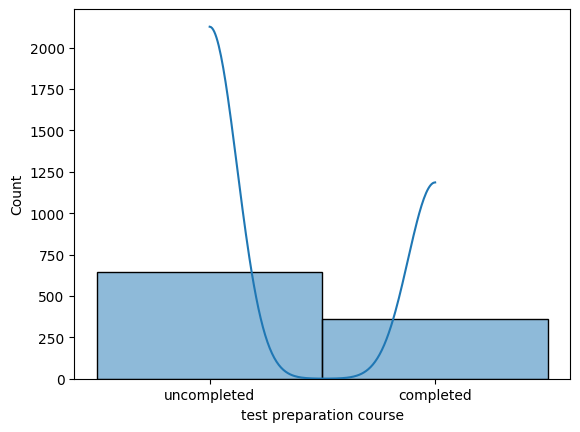

In [28]:
from re import T
for feature in categorical_features:
    sns.histplot(df,x=feature,kde=True)
    plt.show()

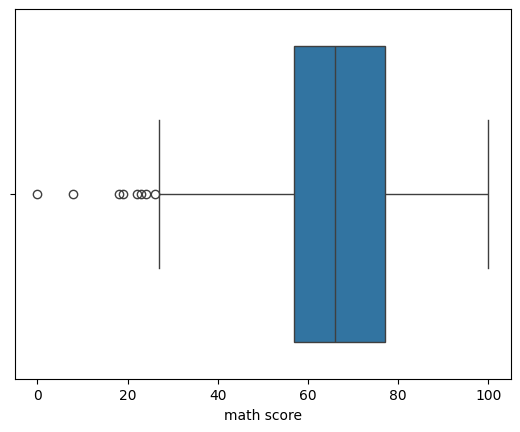

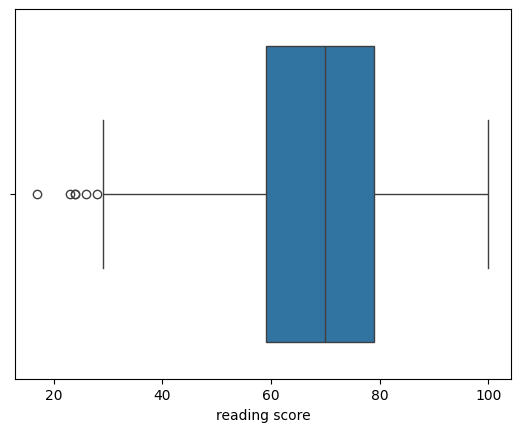

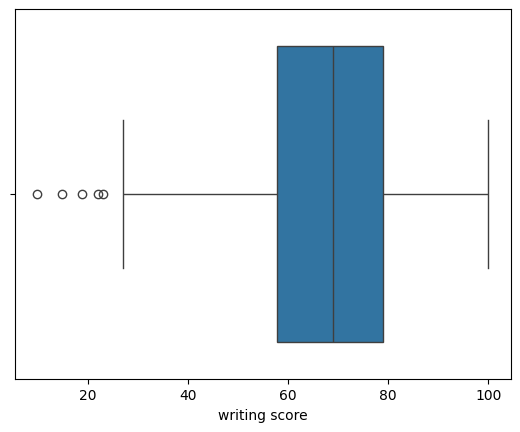

In [11]:
for column in numerical_features:
    sns.boxplot(df,x=column)
    plt.show()

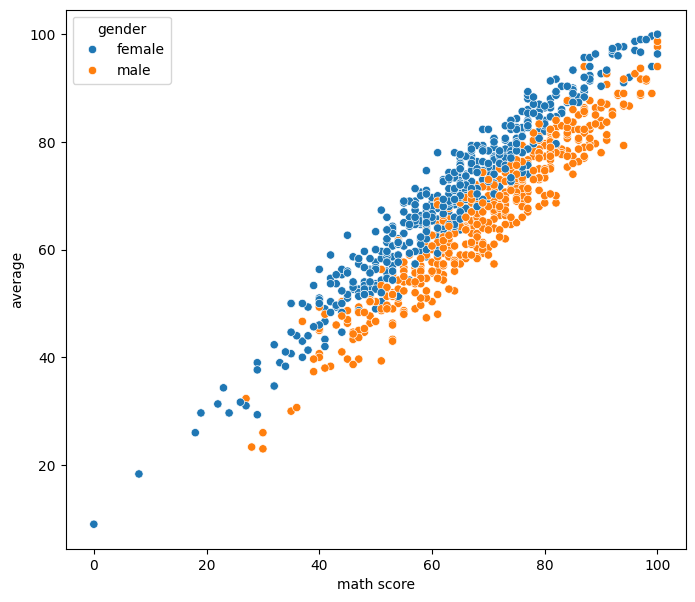

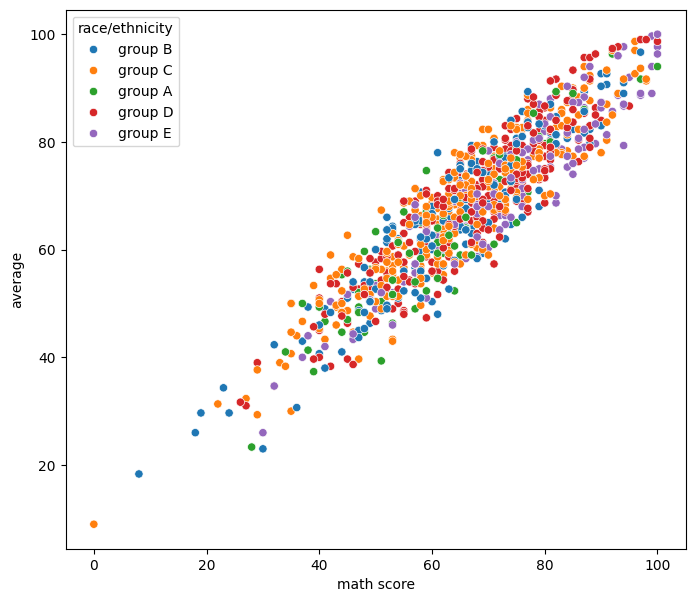

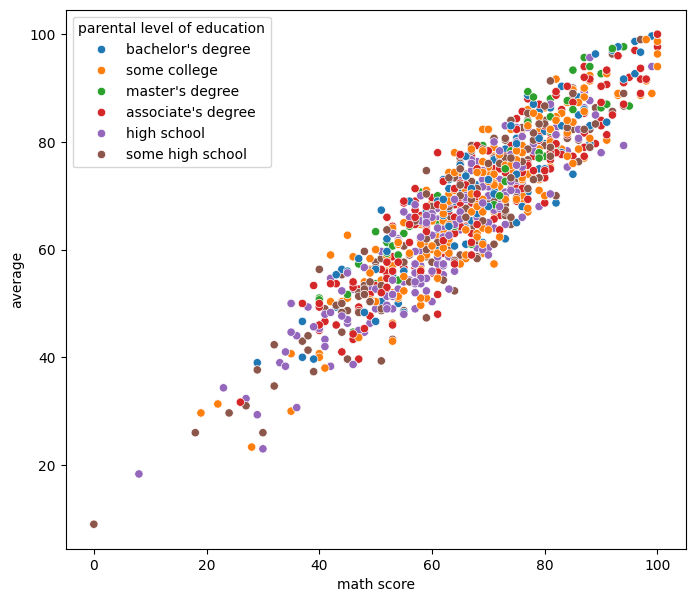

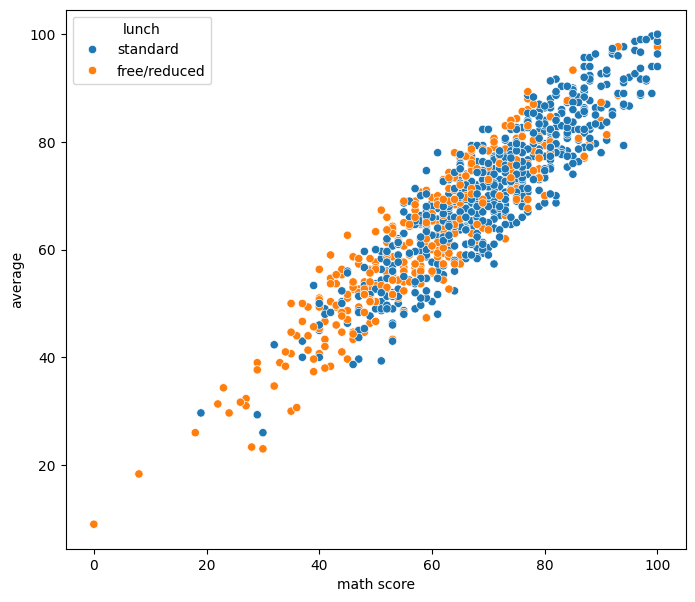

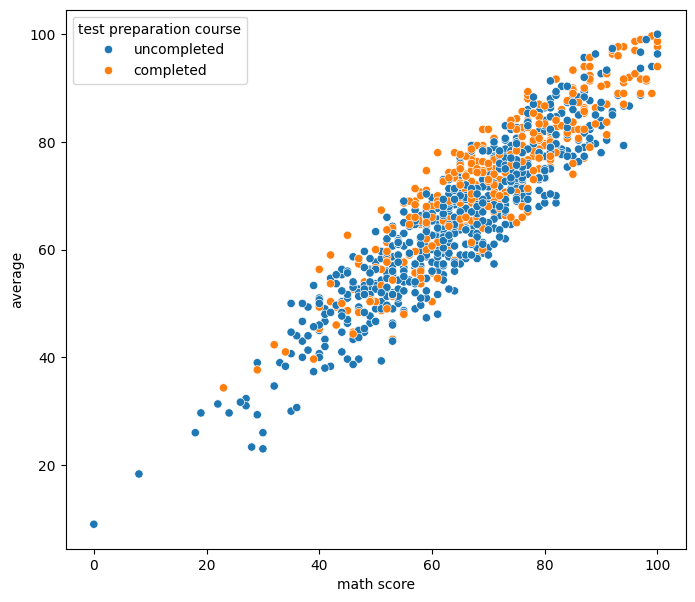

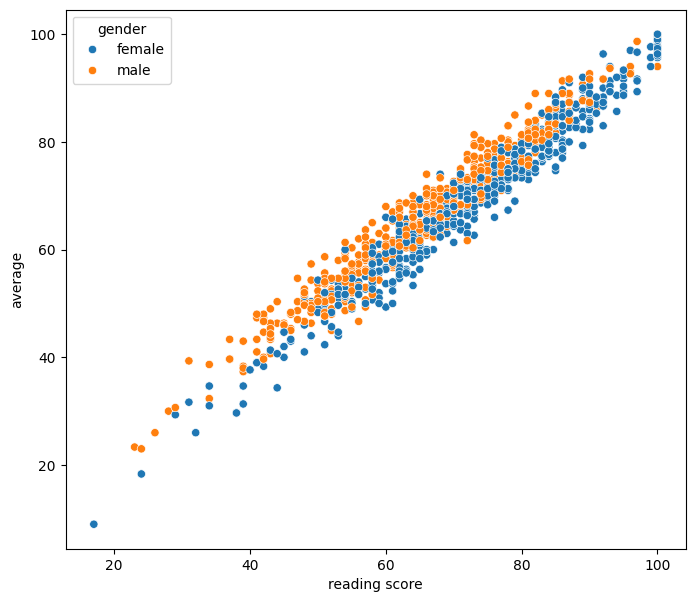

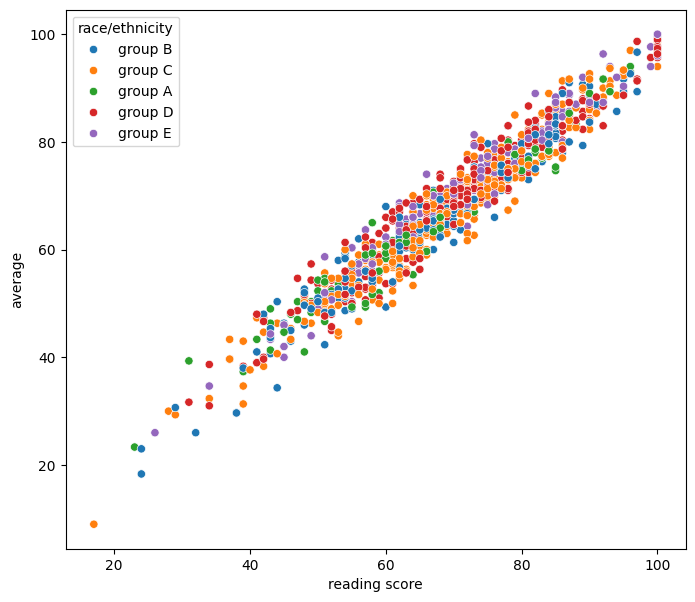

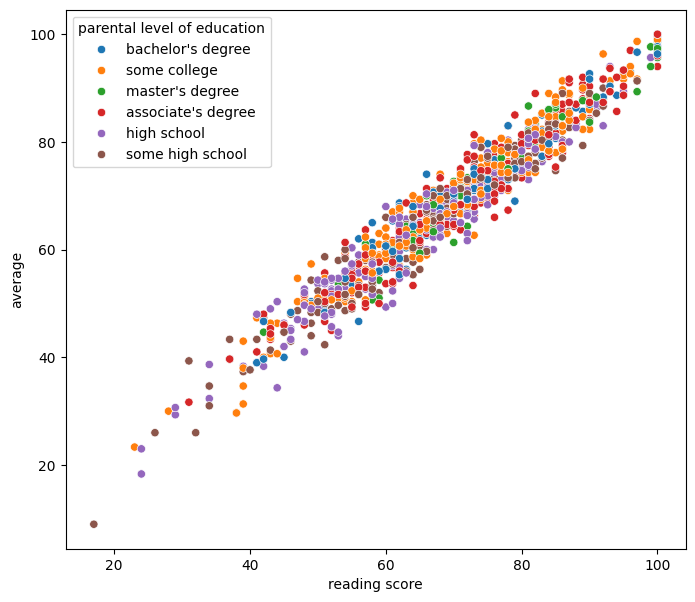

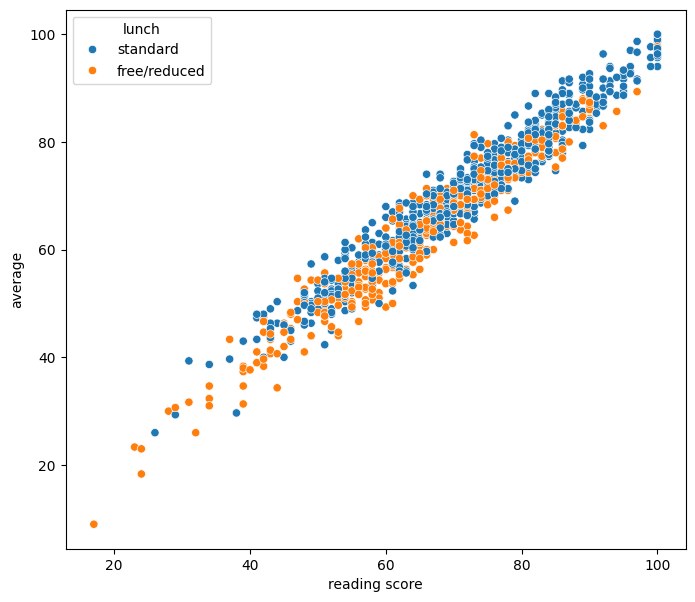

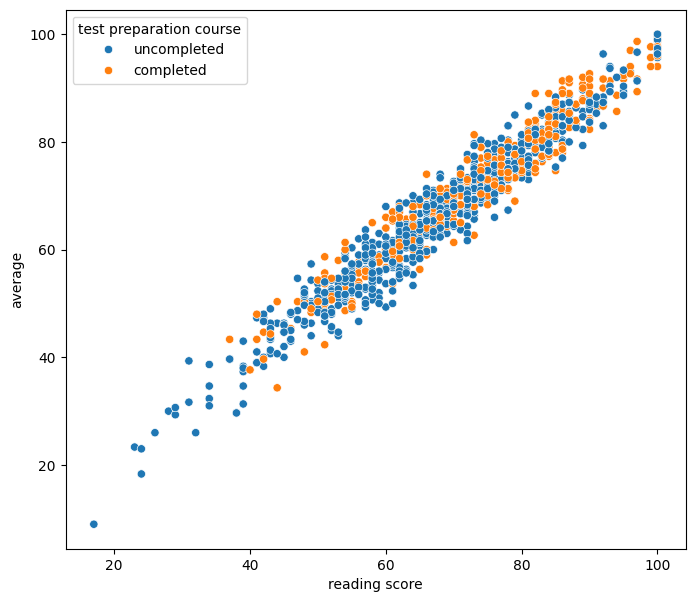

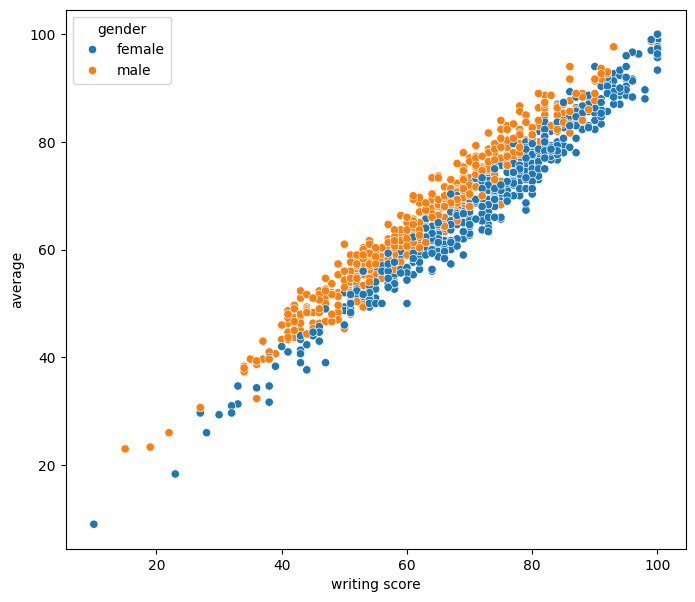

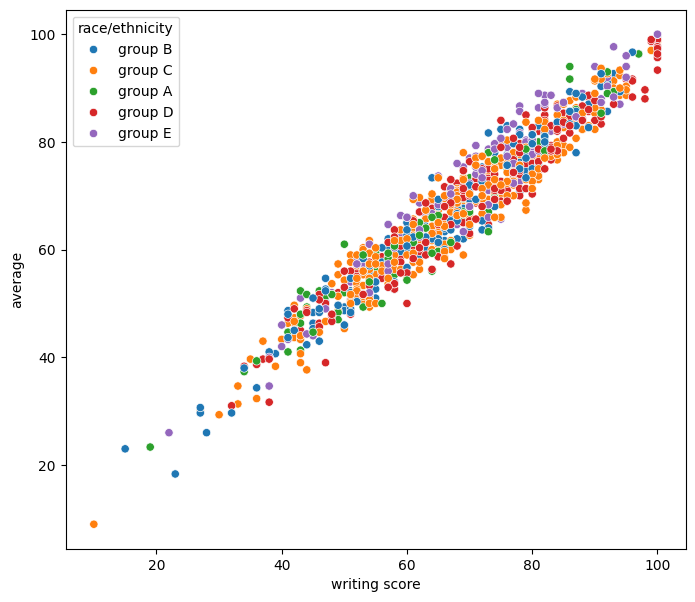

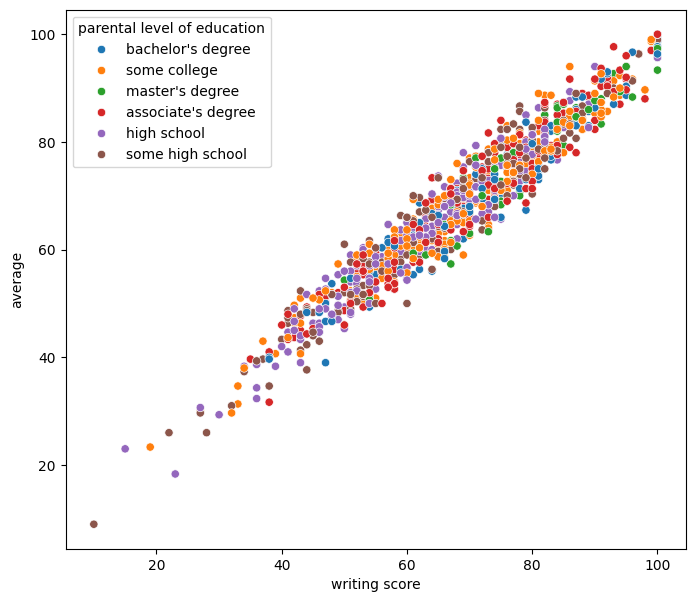

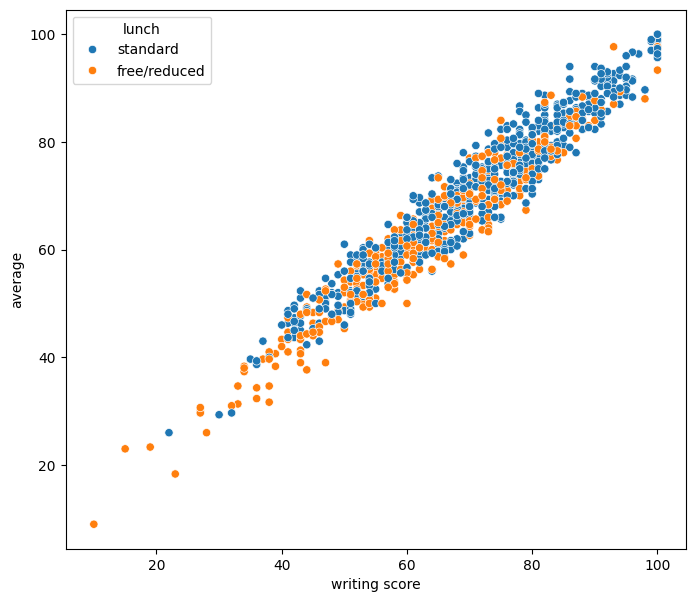

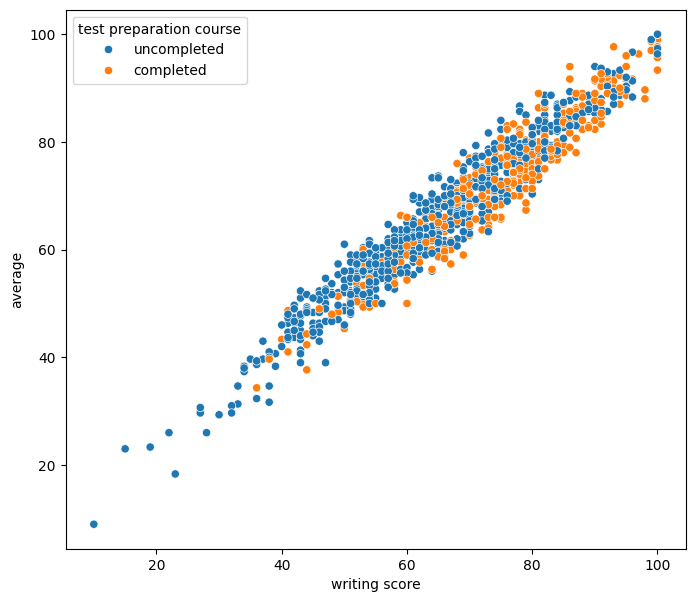

In [39]:
for column in numerical_features:
    if column=='average':
        continue
    for sep in categorical_features:
        plt.figure(figsize=(8,7))
        sns.scatterplot(df,x=column,y='average',hue=sep)
        plt.show()

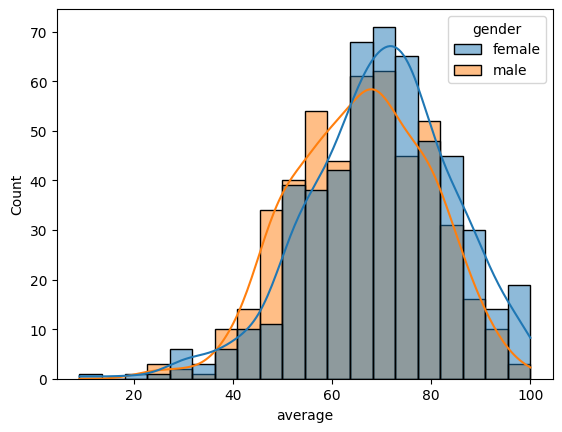

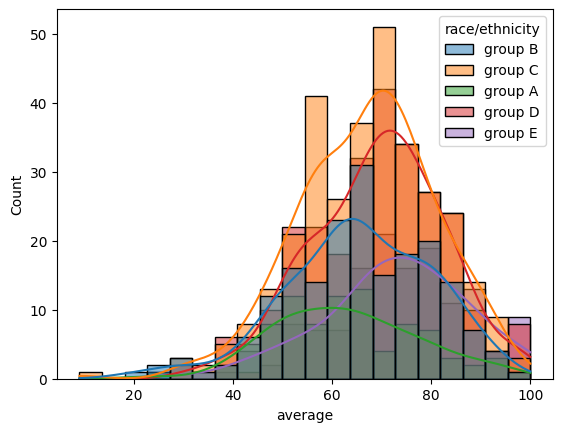

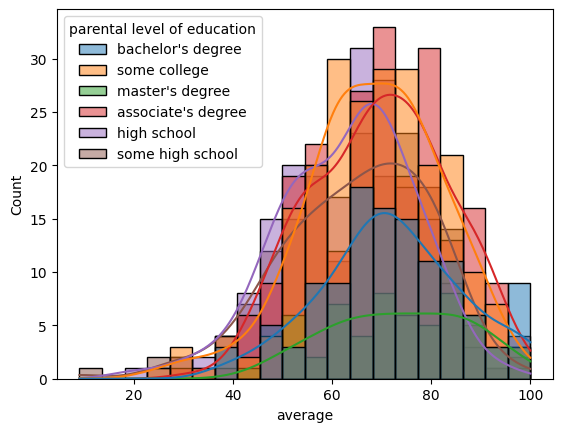

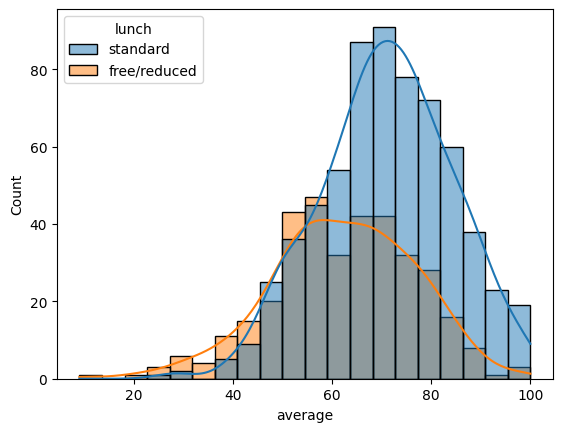

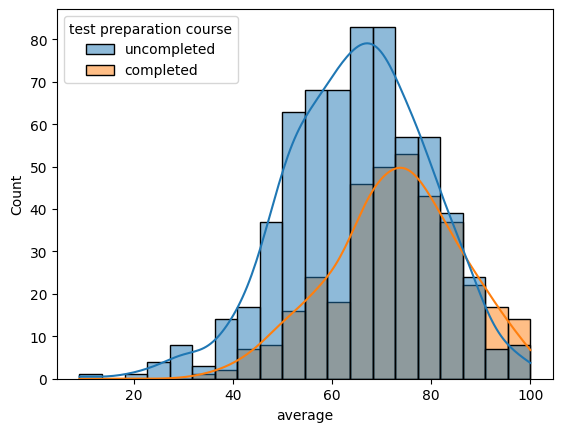

In [38]:
for feature in categorical_features:
    sns.histplot(data=df,x='average',bins=20,kde=True,hue=feature)
    plt.show()

Conclusion:


*   The average marks are linearly dependent on independent features.
*   Female students are leading in the percentage
*   For race/ethnicity the Group C is leading
*   Students with standard lunch are doing well
*   Student performance is not much depends upon the test preparation completion


